# Cart Pole game
# On-Policy Learning

### Environment: OpenAi Gym 

https://openai.com/

### Random action for the CartPole game

In [ ]:
import gym
import time
env = gym.make('CartPole-v0')
for i_episode in range(3):
    observation = env.reset()
    for t in range(200):
        env.render()
        time.sleep(0.02)
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        print(reward)
#        if done:
#            print("Episode finished after {} timesteps".format(t+1))
#            break

# Policy Gradient method for playing Cart Pole game

### Loadding library

In [2]:
import gym
#from RL_brain import PolicyGradient
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#DISPLAY_REWARD_THRESHOLD = 400  # renders environment if total episode reward is greater then this threshold


/home/yanhua/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Create environment

In [3]:
RENDER = False  # rendering wastes time

env = gym.make('CartPole-v0')
env.seed(1)     # reproducible, general Policy gradient has high variance
env = env.unwrapped

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


### CartPole environment information

In [4]:
print(env.action_space)
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)


Discrete(2)
Box(4,)
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


# Built neural network graph.

### 2 dense layer neural network. output the probability of action.

In [5]:
# setting the network parameter
output_graph=False
learning_rate=0.01
reward_decay=0.95
    
n_actions = env.action_space.n
n_features = env.observation_space.shape[0]
lr = learning_rate
gamma = reward_decay

ep_obs, ep_as, ep_rs = [], [], []

with tf.name_scope('inputs'):
        tf_obs = tf.placeholder(tf.float32, [None, n_features], name="observations")
        tf_acts = tf.placeholder(tf.int32, [None, ], name="actions_num")
        tf_vt = tf.placeholder(tf.float32, [None, ], name="actions_value")
    # fc1
layer = tf.layers.dense(
        inputs=tf_obs,
        units=10,
        activation=tf.nn.tanh,  # tanh activation
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.3),
        bias_initializer=tf.constant_initializer(0.1),
        name='fc1'
    )
    # fc2
all_act = tf.layers.dense(
        inputs=layer,
        units=n_actions,
        activation=None,
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.3),
        bias_initializer=tf.constant_initializer(0.1),
        name='fc2'
    )


### output the approximate action for maximum reward.

In [6]:
all_act_prob = tf.nn.softmax(all_act, name='act_prob')  # use softmax to convert to probability

## The policy gradient method.

### $log[\pi(action|state)]*R(state,action)$

## $W = W + LearningRate*log[\pi(action|state)]*R(state,action)$
https://www.sharelatex.com/learn/Mathematical_expressions

http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

In [7]:
with tf.name_scope('loss'):
    # to maximize total reward (log_p * R) is to minimize -(log_p * R), and the tf only have minimize(loss)
    neg_log_prob = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=all_act, labels=tf_acts)   # this is negative log of chosen action
        # or in this way:
    # neg_log_prob = tf.reduce_sum(-tf.log(all_act_prob)*tf.one_hot(tf_acts, n_actions), axis=1)
loss = tf.reduce_mean(neg_log_prob * tf_vt)  # reward guided loss

# Run the tensorflow graph.

In [8]:
with tf.name_scope('train'):
    train_op = tf.train.AdamOptimizer(lr).minimize(loss)
    
sess = tf.Session()

if output_graph:
    # $ tensorboard --logdir=logs
    # http://0.0.0.0:6006/
    # tf.train.SummaryWriter soon be deprecated, use following
    tf.summary.FileWriter("logs/", sess.graph)

sess.run(tf.global_variables_initializer())

In [9]:
env.observation_space.shape

(4,)

### choosing the action form the probability of action.

In [10]:
def choose_action(observation):
    prob_weights = sess.run(all_act_prob, feed_dict={tf_obs: observation[np.newaxis, :]})
    action = np.random.choice(range(prob_weights.shape[1]), p=prob_weights.ravel())  # select action w.r.t the actions prob
    return action

###  store the data for training the neural network.

In [11]:
def store_transition(s, a, r):
    ep_obs.append(s)
    ep_as.append(a)
    ep_rs.append(r)

### Play self for training the model.

In [12]:
game_episodes=500 #game episodes setting for traning.

# Training the nueral network.
training per one time game.

episode: 0   reward: 14


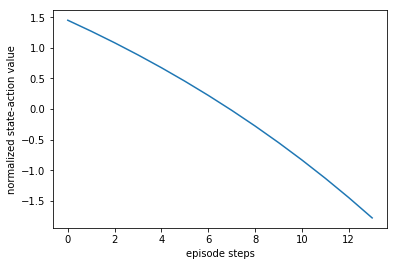

episode: 1   reward: 13
episode: 2   reward: 14
episode: 3   reward: 14
episode: 4   reward: 14
episode: 5   reward: 14
episode: 6   reward: 14
episode: 7   reward: 14
episode: 8   reward: 14
episode: 9   reward: 14
episode: 10   reward: 14
episode: 11   reward: 14
episode: 12   reward: 14
episode: 13   reward: 14
episode: 14   reward: 15
episode: 15   reward: 15
episode: 16   reward: 15
episode: 17   reward: 15
episode: 18   reward: 15
episode: 19   reward: 15
episode: 20   reward: 15
episode: 21   reward: 15
episode: 22   reward: 15
episode: 23   reward: 15
episode: 24   reward: 15
episode: 25   reward: 15
episode: 26   reward: 15
episode: 27   reward: 15
episode: 28   reward: 15
episode: 29   reward: 15
episode: 30   reward: 16
episode: 31   reward: 15
episode: 32   reward: 16
episode: 33   reward: 16
episode: 34   reward: 16
episode: 35   reward: 16
episode: 36   reward: 16
episode: 37   reward: 17
episode: 38   reward: 17
episode: 39   reward: 18
episode: 40   reward: 18
episode: 

In [14]:
for i_episode in range(game_episodes):

    observation = env.reset()

    while True:
        if RENDER: env.render()

        action = choose_action(observation)

        observation_, reward, done, info = env.step(action)

        store_transition(observation, action, reward)

        if done:
            ep_rs_sum = sum(ep_rs)

            if 'running_reward' not in globals():
                running_reward = ep_rs_sum
            else:
                running_reward = running_reward * 0.99 + ep_rs_sum * 0.01
            #if running_reward > DISPLAY_REWARD_THRESHOLD: RENDER = True     # rendering
            print("episode:", i_episode, "  reward:", int(running_reward))

            # discount and normalize episode reward
            # discount episode rewards
            discounted_ep_rs = np.zeros_like(ep_rs)
            running_add = 0
            for t in reversed(range(0, len(ep_rs))):
                running_add = running_add * gamma + ep_rs[t]
                discounted_ep_rs[t] = running_add

            # normalize episode rewards
            discounted_ep_rs -= np.mean(discounted_ep_rs)
            discounted_ep_rs /= np.std(discounted_ep_rs)
     
            discounted_ep_rs_norm = discounted_ep_rs

            # train on episode
            sess.run(train_op, feed_dict={
                tf_obs: np.vstack(ep_obs),  # shape=[None, n_obs]
                tf_acts: np.array(ep_as),  # shape=[None, ]
                tf_vt: discounted_ep_rs_norm,  # shape=[None, ]
            })

            ep_obs, ep_as, ep_rs = [], [], []    # empty episode data
     
            vt = discounted_ep_rs_norm

            if i_episode == 0:
                plt.plot(vt)    # plot the episode vt
                plt.xlabel('episode steps')
                plt.ylabel('normalized state-action value')
                plt.show()
            break

        observation = observation_
    if int(running_reward)>2000:
        #3000
        break

wait a moment... ...

# What is Reinforcement Learning

The processing is Random action start -> Learning from self training and got error (reward) in environment -> Become Master

Reinforcement Learning is the method of Learning from self-training error (reward) .

RL used case: DeepMind AlphaGo (Model based RL) , Human behavior Robot . Self-driving car

RL not use loss. RL use the reward.  For training the neural network.

Some methods in Reinforcement Learning

    1,valuable base: Q-learning, Sarsa
    2,action base: Policy Gradients **
    3,model base: Model based RL (know the environment)


# What is Policy Gradient

action base

output is probability of choosing action.

use the reward to change the probability high or low for the action.

and traing the neural network.

# Testing the traned neural network for checking performance.

In [15]:
for i_episode in range(1):

    observation = env.reset()

    while True:
        if RENDER: env.render()

        action = choose_action(observation)

        observation_, reward, done, info = env.step(action)

        if done:
            break

        observation = observation_

In [16]:
RENDER = True

In [17]:
game_episodes=1 #game episodes setting for traning.

episode: 0   reward: 2315


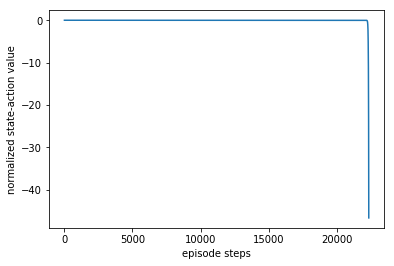

In [18]:
for i_episode in range(game_episodes):

    observation = env.reset()

    while True:
        if RENDER: env.render()

        action = choose_action(observation)

        observation_, reward, done, info = env.step(action)

        store_transition(observation, action, reward)

        if done:
            ep_rs_sum = sum(ep_rs)

            if 'running_reward' not in globals():
                running_reward = ep_rs_sum
            else:
                running_reward = running_reward * 0.99 + ep_rs_sum * 0.01
            #if running_reward > DISPLAY_REWARD_THRESHOLD: RENDER = True     # rendering
            print("episode:", i_episode, "  reward:", int(running_reward))

            # discount and normalize episode reward
            # discount episode rewards
            discounted_ep_rs = np.zeros_like(ep_rs)
            running_add = 0
            for t in reversed(range(0, len(ep_rs))):
                running_add = running_add * gamma + ep_rs[t]
                discounted_ep_rs[t] = running_add

            # normalize episode rewards
            discounted_ep_rs -= np.mean(discounted_ep_rs)
            discounted_ep_rs /= np.std(discounted_ep_rs)
     
            discounted_ep_rs_norm = discounted_ep_rs

            ep_obs, ep_as, ep_rs = [], [], []    # empty episode data
     
            vt = discounted_ep_rs_norm

            if i_episode == 0:
                plt.plot(vt)    # plot the episode vt
                plt.xlabel('episode steps')
                plt.ylabel('normalized state-action value')
                plt.show()
            break

        observation = observation_

# Store the neural network model.

In [14]:
saver = tf.train.Saver()

In [30]:
#saver_path = saver.save(sess,"/home/yanhua/Documents/jupyter/yan/demo/save_model/PG_CartPole/model.ckpt")
#print("Model saved in path: %s" % saver_path)

Model saved in path: /home/yanhua/Documents/jupyter/yan/demo/save_model/PG_CartPole/model.ckpt


In [15]:
saver.restore(sess,"/home/yanhua/Documents/jupyter/yan/demo/save_model/PG_CartPole/model.ckpt")
print("Model restored.")

INFO:tensorflow:Restoring parameters from /home/yanhua/Documents/jupyter/yan/demo/save_model/PG_CartPole/model.ckpt
Model restored.


In [16]:
RENDER = True

In [17]:
for i_episode in range(1):

    observation = env.reset()

    while True:
        if RENDER: env.render()

        action = choose_action(observation)

        observation_, reward, done, info = env.step(action)

        if done:
            break

        observation = observation_

# initializer the neural network for random action

In [24]:
sess.run(tf.global_variables_initializer())

In [25]:
for i_episode in range(3):

    observation = env.reset()

    for t in range(200):
        env.render()
        time.sleep(0.02)
        action = choose_action(observation)
        observation_, reward, done, info = env.step(action)
        observation = observation_

WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


jupyter is just for understanding scenario.

for real developing :
env, method (A3C,PG,DDPG,Q-learning,... etc) ---> at least we can design two oriented object for the Reinforcement Learning.
main programing---> Reinforcement Learning task scenario.
